In [1]:
import pandaset
import os

# load dataset
dataset = pandaset.DataSet('../../test/data')
seq002 = dataset["002"]
seq002.load()
print(seq002.camera.keys())

dict_keys(['front_right_camera', 'back_camera', 'front_left_camera', 'left_camera', 'right_camera', 'front_camera'])


In [2]:
from pandaset import geometry

""" Function projection in pandaset.geometry"""
'''
def projection(lidar: Lidar, camera: Camera, idx: int, filter_outliers=True):
    assert idx < len(lidar.data), "idx is bigger than lidar sequence lenght or lidar is not loaded"
    assert idx < len(camera.data), "idx is bigger than camera sequence lenght or camera is not loaded"

    camera_pose = camera.poses[idx]
    camera_heading = camera_pose['heading']
    camera_position = camera_pose['position']
    camera_pose_mat = _heading_position_to_mat(camera_heading, camera_position)

    trans_lidar_to_camera = np.linalg.inv(camera_pose_mat)
    points3d_lidar = lidar.data[idx].to_numpy()[:, :3]
    points3d_camera = trans_lidar_to_camera[:3, :3] @ (points3d_lidar.T) + \
                        trans_lidar_to_camera[:3, 3].reshape(3, 1)

    K = np.eye(3, dtype=np.float64)
    K[0, 0] = camera_pose['fx']
    K[1, 1] = camera_pose['fy']
    K[0, 2] = camera_pose['cx']
    K[1, 2] = camera_pose['cy']

    inliner_idx_arr = np.arange(points3d_camera.shape[1])
    if filter_outliers:
        condition = points3d_camera[2, :] > 0.0
        points3d_camera = points3d_camera[:, condition]
        inliner_idx_arr = inliner_idx_arr[condition]

    points2d_camera = K @ points3d_camera
    points2d_camera = (points2d_camera[:2, :] / points2d_camera[2, :]).T

    if filter_outliers:
        image_w, image_h = camera.data[0].size
        condition = np.logical_and((points2d_camera[:, 1] < image_h) & (points2d_camera[:, 1] > 0),
                                    (points2d_camera[:, 0] < image_w) & (points2d_camera[:, 0] > 0))
        points2d_camera = points2d_camera[condition]
        points3d_camera = (points3d_camera.T)[condition]
        inliner_idx_arr = inliner_idx_arr[condition]
    return points2d_camera, points3d_camera, inliner_idx_arr
'''

# generate projection points
seq_idx = 1
camera_name = "front_camera"
projection_points2d, camera_points_3d, inliner_idx = geometry.projection(lidar=seq002.lidar, 
                                                                          camera=seq002.camera[camera_name], 
                                                                          idx=seq_idx, 
                                                                          filter_outliers=True)
print(projection_points2d.shape)

(68659, 2)


Populating the interactive namespace from numpy and matplotlib


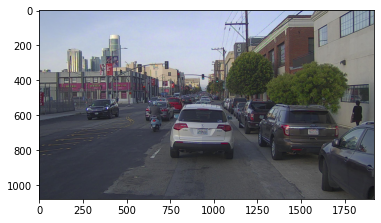

In [4]:
from matplotlib import pyplot as plt
%pylab inline

# image before projection
ori_image = seq002.camera[camera_name][seq_idx]
plt.imshow(ori_image)

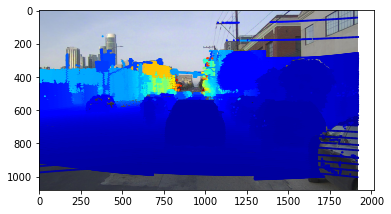

In [5]:
import matplotlib.cm as cm
import numpy as np

# image after projection
plt.imshow(ori_image)
distances = np.sqrt(np.sum(np.square(camera_points_3d), axis=-1))
colors = cm.jet(distances / np.max(distances))
plt.gca().scatter(projection_points2d[:, 0], projection_points2d[:, 1], color=colors, s=1)